In [1]:
%cat 0Source_Citation.txt

Source and citation

- This notebook is a part of the `pytheos` package.
- Website: http://github.com/SHDShim/pytheos.
- How to cite: S.-H. Shim (2017) Pytheos - a python tool set for equations of state. DOI: 10.5281/zenodo.802392


In [2]:
%matplotlib inline
# %matplotlib notebook # for interactive

For high dpi displays.

In [3]:
%config InlineBackend.figure_format = 'retina'

# 0. General note

This notebook shows how to calculate thermal pressure and associated terms in the constant q approach.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import uncertainties as uct
from uncertainties import unumpy as unp
import pandas as pd
import pytheos as eos

# 1. Calculate Debye energy with uncertainties

Assign uncertainties to `x`.  

In [5]:
x = unp.uarray(np.linspace(0.01,15.,20), np.ones(20)*0.5) # 0.1,7.25

In [6]:
energy = eos.debye_E(x)

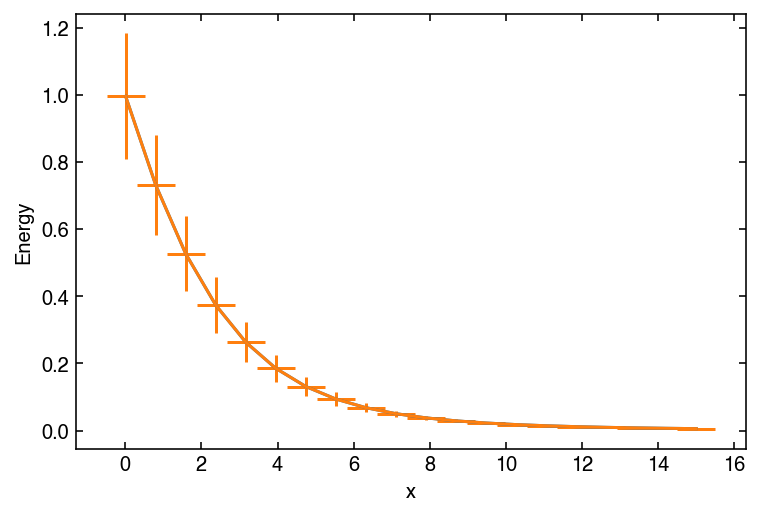

In [7]:
plt.plot(unp.nominal_values(x), unp.nominal_values(energy))
plt.xlabel('x'); plt.ylabel('Energy')
plt.errorbar(unp.nominal_values(x), unp.nominal_values(energy), 
             xerr = unp.std_devs(x), yerr = unp.std_devs(energy));

# 2. Calculate Gruneisen parameter

You may get some help on how to call the function using `help()` command.  `constq_grun` calculates Gruneisen $(\gamma)$ parameter with error propagation based on the following relation:

$$\dfrac{\gamma}{\gamma_0} = \left( \dfrac{V}{V_0} \right)^q$$

where $\gamma_0$ is the Gruneisen parameter at reference conditions and $V$ is the volume.  $q$ is the logarithmic volume dependence of Gruneisen parameter.

In [8]:
help(eos.constq_grun)

Help on function constq_grun in module pytheos.eqn_therm_constq:

constq_grun(v, v0, gamma0, q)
    calculate Gruneisen parameter for constant q
    
    :param v: unit-cell volume in A^3
    :param v0: unit-cell volume in A^3 at 1 bar
    :param gamma0: Gruneisen parameter at 1 bar
    :param q: logarithmic derivative of Grunseinen parameter
    :return: Gruneisen parameter at a given volume



Calculate Gruneisen parameter without error bar.

In [9]:
v0 = 162.3
v = np.linspace(v0, v0*0.8, 20)
grun = eos.constq_grun(v, v0, 1.5, 2)

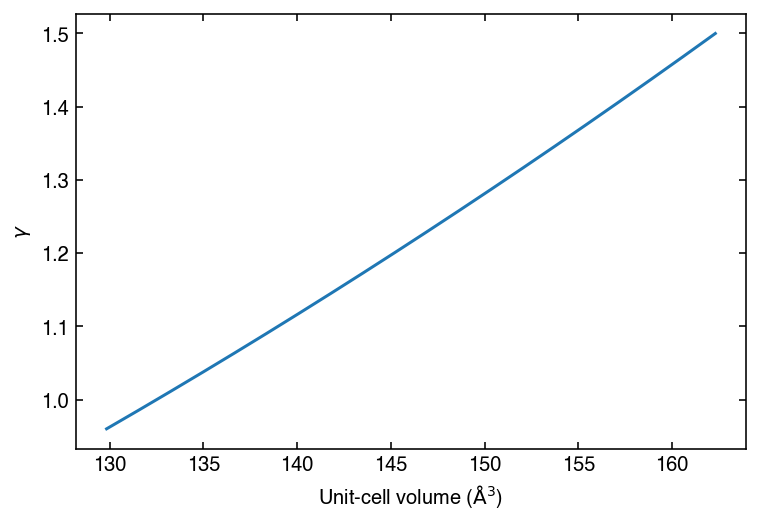

In [10]:
plt.plot(v, grun)
plt.xlabel('Unit-cell volume ($\mathrm{\AA}^3$)'); plt.ylabel('$\gamma$');

The cell below shows how to do error propagation.

In [11]:
s_v = np.random.uniform(0., 0.1, 20)
v_u = unp.uarray(v, s_v)
gamma = eos.constq_grun(v_u, uct.ufloat(v0, 0.01), uct.ufloat(1.5, 0.1), uct.ufloat(2.,0.5))
gamma

array([1.5+/-0.10001405265760077, 1.4685872576177283+/-0.09822941275595312,
       1.4375069252077564+/-0.09705298328144459,
       1.406759002770083+/-0.09646180963378585,
       1.3763434903047091+/-0.09642105368374869,
       1.3462603878116342+/-0.09684960744285176,
       1.3165096952908588+/-0.09771113564882783,
       1.287091412742382+/-0.0989393544048456,
       1.2580055401662051+/-0.10047628319831588,
       1.2292520775623266+/-0.1022737726860229,
       1.200831024930748+/-0.1042590200417027,
       1.1727423822714682+/-0.10639625505817239,
       1.1449861495844877+/-0.10864448040725683,
       1.1175623268698058+/-0.11096585460025567,
       1.0904709141274238+/-0.11332878599343371,
       1.0637119113573406+/-0.11569383273945792,
       1.0372853185595567+/-0.11803216383150865,
       1.0111911357340722+/-0.120341398101224,
       0.9854293628808866+/-0.12259542449529823,
       0.9599999999999999+/-0.12477336673974994], dtype=object)

If you need a pretty table.

In [12]:
df = pd.DataFrame()
df['volume'] = v_u
df['gamma'] = gamma
print(df.to_string(index=False))

volume        gamma
    162.30+/-0.09  1.50+/-0.10
    160.59+/-0.10  1.47+/-0.10
    158.88+/-0.06  1.44+/-0.10
  157.175+/-0.005  1.41+/-0.10
    155.47+/-0.07  1.38+/-0.10
  153.758+/-0.017  1.35+/-0.10
  152.049+/-0.016  1.32+/-0.10
  150.341+/-0.010  1.29+/-0.10
  148.633+/-0.017  1.26+/-0.10
    146.92+/-0.08  1.23+/-0.10
    145.22+/-0.07  1.20+/-0.10
    143.51+/-0.05  1.17+/-0.11
    141.80+/-0.05  1.14+/-0.11
    140.09+/-0.06  1.12+/-0.11
    138.38+/-0.10  1.09+/-0.11
    136.67+/-0.10  1.06+/-0.12
  134.965+/-0.018  1.04+/-0.12
133.2568+/-0.0021  1.01+/-0.12
    131.55+/-0.04  0.99+/-0.12
  129.840+/-0.017  0.96+/-0.12


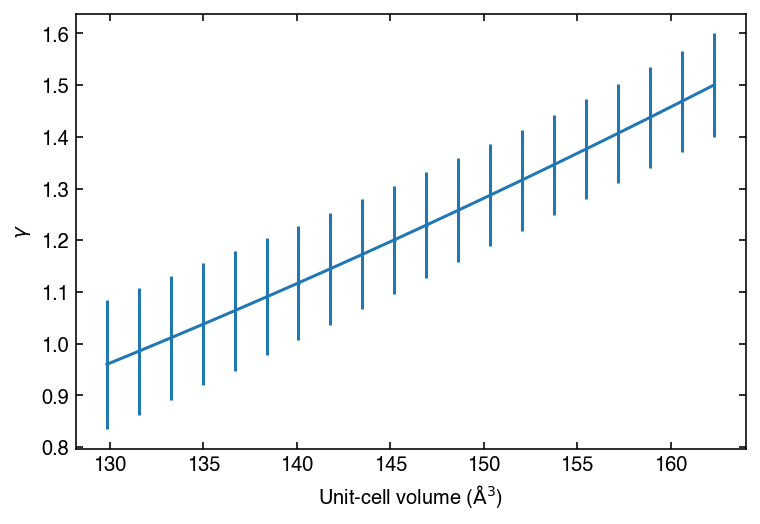

In [13]:
plt.errorbar(unp.nominal_values(v_u), unp.nominal_values(gamma), xerr=unp.std_devs(v_u), yerr=unp.std_devs(gamma))
plt.xlabel('Unit-cell volume ($\mathrm{\AA}^3$)'); plt.ylabel('$\gamma$');

You do not need to provide uncertainties for all the parameters.  The cell below shows a case where we do not have error bars for the parameters.  In this case, we have uncertainties for volume.

In [14]:
eos.constq_grun(v_u, v0, 1.5, 2.)

array([1.5+/-0.001666301925144115,
       1.4685872576177283+/-0.0017484301893260406,
       1.4375069252077564+/-0.0011188543478915975,
       1.406759002770083+/-8.787834646625978e-05,
       1.3763434903047091+/-0.001194286743898007,
       1.3462603878116342+/-0.0002976203286018292,
       1.3165096952908588+/-0.0002737107620308666,
       1.287091412742382+/-0.00017059557391560282,
       1.2580055401662051+/-0.00028791517360596665,
       1.2292520775623266+/-0.0013717374551989266,
       1.200831024930748+/-0.0011279935025669205,
       1.1727423822714682+/-0.0008259184061025688,
       1.1449861495844877+/-0.0007362057708904448,
       1.1175623268698058+/-0.0009682737034363837,
       1.0904709141274238+/-0.0015225352014707977,
       1.0637119113573406+/-0.001532507287239117,
       1.0372853185595567+/-0.00027445269286616197,
       1.0111911357340722+/-3.168850371514276e-05,
       0.9854293628808866+/-0.0006368295187551985,
       0.9599999999999999+/-0.0002481966943654321

# 3. Calculate Debye temperature and thermal pressure

You can get the Debye temperatures with error bars.

In [15]:
help(eos.constq_debyetemp)

Help on function constq_debyetemp in module pytheos.eqn_therm_constq:

constq_debyetemp(v, v0, gamma0, q, theta0)
    calculate Debye temperature for constant q
    
    :param v: unit-cell volume in A^3
    :param v0: unit-cell volume in A^3 at 1 bar
    :param gamma0: Gruneisen parameter at 1 bar
    :param q: logarithmic derivative of Gruneisen parameter
    :param theta0: Debye temperature at 1 bar
    :return: Debye temperature in K



In [16]:
eos.constq_debyetemp(v_u, v0, 1.5, 2., 1000.)

array([1000.0+/-0.8331509625720576,
       1015.8303645504885+/-0.8880542383070756,
       1031.7398349865637+/-0.577183300133838,
       1047.7243207919184+/-0.046036140431839456,
       1063.7796300436687+/-0.6352289552949397,
       1079.901470649432+/-0.1607003152761413,
       1096.0854516873335+/-0.15000519211614335,
       1112.327084849175+/-0.09487903871085722,
       1128.6217859868752+/-0.1624736687239437,
       1144.964876762185+/-0.7852956031709564,
       1161.351586399536+/-0.6549985218272311,
       1177.777053541791+/-0.4863738734027079,
       1194.2363282085053+/-0.4396018383170584,
       1210.7243738562106+/-0.5861562866572249,
       1227.2360695400907+/-0.9342550581947261,
       1243.7662121763+/-0.953040391890987,
       1260.309518904035+/-0.1729476706540347,
       1276.860629546358+/-0.020230901401549643,
       1293.414109168624+/-0.41184214234651934,
       1309.9644507332475+/-0.16256442320411046], dtype=object)

You can get thermal pressures with error bars.

In [17]:
help(eos.constq_pth)

Help on function constq_pth in module pytheos.eqn_therm_constq:

constq_pth(v, temp, v0, gamma0, q, theta0, n, z, t_ref=300.0, three_r=24.943379399999998)
    calculate thermal pressure for constant q
    
    :param v: unit-cell volume in A^3
    :param temp: temperature
    :param v0: unit-cell volume in A^3 at 1 bar
    :param gamma0: Gruneisen parameter at 1 bar
    :param q: logarithmic derivative of Gruneisen parameter
    :param theta0: Debye temperature in K
    :param n: number of atoms in a formula unit
    :param z: number of formula unit in a unit cell
    :param t_ref: reference temperature
    :param three_r: 3R in case adjustment is needed
    :return: thermal pressure in GPa



In [18]:
p_th = eos.constq_pth(v_u, unp.uarray(np.ones_like(v)*2000., np.ones_like(v)*100), v0, 1.5, 2., 1000., 5, 4)
p_th

array([12.070619165469735+/-0.756167032695518,
       11.917512369564442+/-0.7479168646536897,
       11.764621139966481+/-0.7396329412604312,
       11.611966188562544+/-0.7313574044922535,
       11.459568259995653+/-0.7231280525059389,
       11.307448093764947+/-0.714851488523403,
       11.155626386256875+/-0.7065993555379326,
       11.004123752837431+/-0.6983480761839687,
       10.852960690132983+/-0.690100432881843,
       10.702157538623986+/-0.6818903356451876,
       10.55173444567231+/-0.6736341809255469,
       10.40171132909803+/-0.6653801475255108,
       10.25210784141702+/-0.6571380954007315,
       10.102943334844497+/-0.6489111604849465,
       9.954236827163966+/-0.6407114132090926,
       9.80600696855425+/-0.6324842041715771,
       9.658272009460562+/-0.6242026654889387,
       9.511049769588395+/-0.6159788636144853,
       9.364357608091542+/-0.6077721156568483,
       9.21821239501829+/-0.5995498235552195], dtype=object)

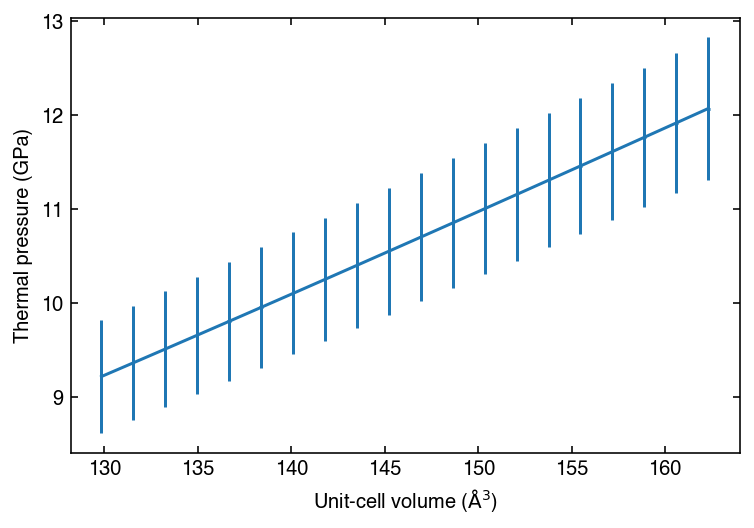

In [19]:
plt.errorbar(unp.nominal_values(v_u), unp.nominal_values(p_th),
            xerr=unp.std_devs(v_u), yerr=unp.std_devs(p_th))
plt.xlabel('Unit-cell volume ($\mathrm{\AA}^3$)'); plt.ylabel('Thermal pressure (GPa)');